In [ ]:
import os
import re
import requests
import subprocess
from pathlib import Path
from tqdm import tqdm


def get_direct_file_link(mailru_file_url: str) -> str:
    """
    Преобразует публичную ссылку вида:
        https://cloud.mail.ru/public/<key>/<subkey>/<filename>
    в прямую ссылку на CDN, по которой можно скачать файл через wget или requests.

    Возвращает прямую ссылку для скачивания.
    """
    resp = requests.get(mailru_file_url)
    if resp.status_code != 200:
        raise RuntimeError(f"Ошибка {resp.status_code} при запросе {mailru_file_url}")

    match = re.search(r'dispatcher.*?weblink_get.*?url":"(.*?)"', resp.text)
    if not match:
        raise RuntimeError("Не удалось найти CDN ссылку в HTML Mail.ru")

    base_url = match.group(1)
    parts = mailru_file_url.strip("/").split("/")[-3:]
    return f"{base_url}/{parts[0]}/{parts[1]}/{parts[2]}"


def download_from_mailru(file_url: str, local_name: str, force: bool = False, show_progress: bool = True):
    """
    Скачивает файл с Mail.ru по публичной ссылке.

    Args:
        file_url: ссылка на файл в облаке Mail.ru.
        local_name: имя файла для сохранения.
        force: если True — перекачивает даже если файл уже есть.
        show_progress: показывать ли прогресс-бар.
    """
    local_path = Path(local_name)
    if local_path.exists() and not force:
        print(f"Файл {local_name} уже существует, пропускаем скачивание.")
        return

    direct = get_direct_file_link(file_url)
    print(f"Скачиваем {file_url} → {local_name}")

    with requests.get(direct, stream=True) as r:
        r.raise_for_status()
        total_size = int(r.headers.get("content-length", 0))
        block_size = 8192
        with open(local_name, "wb") as f, tqdm(
            total=total_size,
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
            desc=f"Downloading {local_name}",
            disable=not show_progress,
        ) as bar:
            for chunk in r.iter_content(block_size):
                f.write(chunk)
                bar.update(len(chunk))

    print(f"Файл {local_name} успешно скачан ({os.path.getsize(local_name)/1e6:.1f} MB).")

In [ ]:
# Ссылки на данные по задаче
train_link = "https://cloud.mail.ru/public/Gsyr/8VxmbhAaZ/train_data.tar"
test_link  = "https://cloud.mail.ru/public/Gsyr/8VxmbhAaZ/test_data.tar"

In [ ]:
# Если скорость загрузки низкая — это может быть связано с CDN.
# Попробуйте перезапустить ячейку: при новом соединении может попасться другой узел CDN,
# и загрузка обычно проходит быстрее (2-3 минуты при нормальном узле).
download_from_mailru(train_link, "train_data.tar")
download_from_mailru(test_link, "test_data.tar")

Скачиваем https://cloud.mail.ru/public/Gsyr/8VxmbhAaZ/train_data.tar → train_data.tar


Файл train_data.tar успешно скачан (2472.0 MB).
Скачиваем https://cloud.mail.ru/public/Gsyr/8VxmbhAaZ/test_data.tar → test_data.tar


Файл test_data.tar успешно скачан (741.0 MB).


In [ ]:
# Распаковка
subprocess.run(["tar", "xf", "train_data.tar"], check=True)
subprocess.run(["tar", "xf", "test_data.tar"], check=True)
print("Готово.")

Готово.



🎯 Epoch 1/4: 100%|██████████| 2000/2000 [53:42<00:00,  1.61s/it, Loss=0.0159, Acc=91.8%, LR=2.00e-05]


📊 Epoch 1: Train Loss: 0.2197, Val Acc: 96.93%
💾 Сохранена лучшая модель с точностью 96.93%


🎯 Epoch 2/4: 100%|██████████| 2000/2000 [51:22<00:00,  1.54s/it, Loss=0.0711, Acc=96.5%, LR=1.72e-05]


📊 Epoch 2: Train Loss: 0.1051, Val Acc: 97.45%
💾 Сохранена лучшая модель с точностью 97.45%


🎯 Epoch 3/4: 100%|██████████| 2000/2000 [51:07<00:00,  1.53s/it, Loss=0.0030, Acc=97.5%, LR=1.05e-05]


📊 Epoch 3: Train Loss: 0.0726, Val Acc: 97.52%
💾 Сохранена лучшая модель с точностью 97.52%


🎯 Epoch 4/4: 100%|██████████| 2000/2000 [51:02<00:00,  1.53s/it, Loss=0.0378, Acc=98.2%, LR=3.78e-06]


📊 Epoch 4: Train Loss: 0.0535, Val Acc: 97.64%
💾 Сохранена лучшая модель с точностью 97.64%
🏆 Лучшая точность: 97.64%


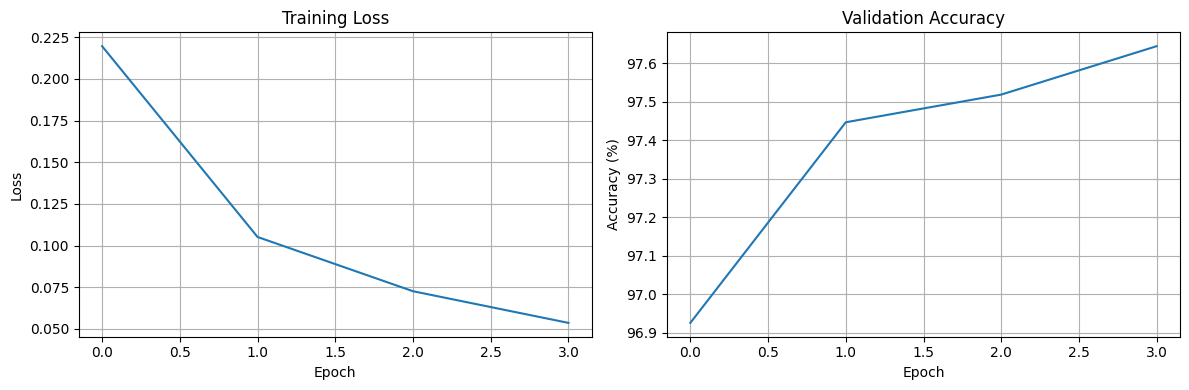


🔮 Начинаем предсказания...
🔮 Умное предсказание...


100%|██████████| 27000/27000 [29:46<00:00, 15.12it/s]



💾 Создаем финальный submission файл...
✅ Финальный submission создан: final_submission.csv
📊 Статистика: 13565 положительных, 13435 отрицательных

💾 Сохраняем файлы...
📁 Сохраняем файлы через Google Colab...
⚠️ Файл sample_submission.csv не найден
💾 Скачиваем final_submission.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 Скачиваем best_xlsr_russian_model.pth...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 Скачиваем training_history.png...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Все файлы готовы для скачивания!

🎉 Обучение завершено! Точность: 97.64%
📁 Созданные файлы:
   - sample_submission.csv (базовый вариант)
   - final_submission.csv (финальные предсказания)
   - best_xlsr_russian_model.pth (веса модели)
   - training_history.png (графики обучения)


In [ ]:
import os
import json
import torch
import torch.nn as nn
import torch.optim as optim
import torchaudio
import numpy as np
import pandas as pd
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import requests
import re
import subprocess
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def setup_colab_gpu():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.backends.cudnn.benchmark = True
        gpu_props = torch.cuda.get_device_properties(0)
        print(f"🎯 Google Colab GPU: {torch.cuda.get_device_name(0)}")
        print(f"💾 GPU Memory: {gpu_props.total_memory / 1024**3:.1f} GB")
        return True
    else:
        print("❌ GPU не доступен")
        return False

USE_GPU = setup_colab_gpu()
device = torch.device('cuda' if USE_GPU else 'cpu')

def save_files_colab():
    """Сохраняет файлы через Google Colab"""
    try:
        from google.colab import files
        print("📁 Сохраняем файлы через Google Colab...")

        files_to_save = [
            'sample_submission.csv',
            'final_submission.csv',
            'best_xlsr_russian_model.pth',
            'training_history.png'
        ]

        for file_name in files_to_save:
            if os.path.exists(file_name):
                print(f"💾 Скачиваем {file_name}...")
                files.download(file_name)
            else:
                print(f"⚠️ Файл {file_name} не найден")

        print("✅ Все файлы готовы для скачивания!")

    except ImportError:
        print("❌ Это не Google Colab environment")

# ==================== DATA DOWNLOAD ====================
def get_direct_file_link(mailru_file_url: str) -> str:
    resp = requests.get(mailru_file_url)
    if resp.status_code != 200:
        raise RuntimeError(f"Ошибка {resp.status_code} при запросе {mailru_file_url}")

    match = re.search(r'dispatcher.*?weblink_get.*?url":"(.*?)"', resp.text)
    if not match:
        raise RuntimeError("Не удалось найти CDN ссылку в HTML Mail.ru")

    base_url = match.group(1)
    parts = mailru_file_url.strip("/").split("/")[-3:]
    return f"{base_url}/{parts[0]}/{parts[1]}/{parts[2]}"

def download_from_mailru(file_url: str, local_name: str, force: bool = False, show_progress: bool = True):
    local_path = Path(local_name)
    if local_path.exists() and not force:
        print(f"Файл {local_name} уже существует, пропускаем скачивание.")
        return

    direct = get_direct_file_link(file_url)
    print(f"Скачиваем {file_url} → {local_name}")

    with requests.get(direct, stream=True) as r:
        r.raise_for_status()
        total_size = int(r.headers.get("content-length", 0))
        block_size = 8192
        with open(local_name, "wb") as f, tqdm(
            total=total_size,
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
            desc=f"Downloading {local_name}",
            disable=not show_progress,
        ) as bar:
            for chunk in r.iter_content(block_size):
                f.write(chunk)
                bar.update(len(chunk))

    print(f"Файл {local_name} успешно скачан ({os.path.getsize(local_name)/1e6:.1f} MB).")

# Скачиваем данные
print("📥 Скачиваем данные...")
train_link = "https://cloud.mail.ru/public/Gsyr/8VxmbhAaZ/train_data.tar"
test_link  = "https://cloud.mail.ru/public/Gsyr/8VxmbhAaZ/test_data.tar"

download_from_mailru(train_link, "train_data.tar")
download_from_mailru(test_link, "test_data.tar")

# Распаковка
print("📦 Распаковываем данные...")
subprocess.run(["tar", "xf", "train_data.tar"], check=True)
subprocess.run(["tar", "xf", "test_data.tar"], check=True)

# Проверяем структуру папок
def find_data_dirs():
    possible_train = ["train_data", "train_opus"]
    possible_test = ["test_data", "test_opus"]

    for dir_name in possible_train:
        if Path(dir_name).exists():
            train_dir = dir_name
            break
    else:
        train_dir = "."

    for dir_name in possible_test:
        if Path(dir_name).exists():
            test_dir = dir_name
            break
    else:
        test_dir = "."

    return train_dir, test_dir

train_dir, test_dir = find_data_dirs()
print(f"📁 Найдены папки: train={train_dir}, test={test_dir}")

# Загружаем разметку
word_bounds = {}
try:
    with open(Path(train_dir) / "word_bounds.json", "r", encoding="utf-8") as f:
        word_bounds = json.load(f)
    print(f"📊 Загружено разметок: {len(word_bounds)}")
except FileNotFoundError:
    print("⚠️ Файл word_bounds.json не найден")

# Получаем списки файлов
def get_audio_files(directory):
    patterns = [
        Path(directory) / "audio" / "*.opus",
        Path(directory) / "*.opus",
    ]

    all_files = []
    for pattern in patterns:
        files = list(Path('.').glob(str(pattern)))
        all_files.extend([str(p) for p in files if not p.name.startswith('._')])

    return list(set(all_files))

train_files = get_audio_files(train_dir)
test_files = get_audio_files(test_dir)

print(f"🎵 Тренировочных файлов: {len(train_files)}")
print(f"🎵 Тестовых файлов: {len(test_files)}")

# ==================== SIMPLE XLS-R RUSSIAN WAV2VEC2 MODEL ====================
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import librosa

class SimpleXLSRClassifier(nn.Module):
    """
    Простой классификатор на основе XLS-R 300M Russian small модели
    Без заморозки слоев - просто используем всю модель
    """
    def __init__(self, model_name="jonatasgrosman/wav2vec2-large-xlsr-53-russian", num_classes=2, dropout=0.3):
        super().__init__()

        print(f"🔄 Загружаем XLS-R русскоязычную модель: {model_name}")

        # Загружаем предобученную модель
        self.wav2vec2 = Wav2Vec2Model.from_pretrained(model_name)
        self.processor = Wav2Vec2Processor.from_pretrained(model_name)

        hidden_size = self.wav2vec2.config.hidden_size
        print(f"✅ Модель загружена. Hidden size: {hidden_size}")

        # Простой классификатор
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),

            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),

            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout/2),

            nn.Linear(64, num_classes)
        )

        print("🎯 Все слои модели разморожены для обучения")

    def forward(self, input_values):
        # Получаем embeddings от Wav2Vec2
        outputs = self.wav2vec2(input_values)
        hidden_states = outputs.last_hidden_state

        # Global average pooling
        pooled_output = hidden_states.mean(dim=1)

        # Классификация
        logits = self.classifier(pooled_output)
        return logits

# ==================== SIMPLE CONFIGURATION ====================
class SimpleConfig:
    # Audio parameters
    sample_rate = 16000
    max_duration = 5.0
    target_length = int(sample_rate * max_duration)

    # Training parameters
    batch_size = 16
    epochs = 4
    learning_rate = 2e-5
    weight_decay = 0.01

    # Model parameters
    dropout = 0.1

    # Data parameters
    train_sample_ratio = 0.42
    validation_size = 0.15

    # Advanced training
    use_fp16 = True

config = SimpleConfig()

# ==================== SIMPLE DATA PROCESSING ====================
class SimpleAudioProcessor:
    def __init__(self, processor, config):
        self.processor = processor
        self.config = config

    def load_and_preprocess(self, audio_path):
        try:
            # Загрузка аудио
            waveform, sr = librosa.load(audio_path, sr=self.config.sample_rate,
                                      duration=self.config.max_duration)
            waveform = torch.from_numpy(waveform).float()

            # Простая обработка длины
            waveform = self._fix_length(waveform)

            return waveform

        except Exception as e:
            return torch.zeros(self.config.target_length)

    def _fix_length(self, waveform):
        current_length = len(waveform)
        target_length = self.config.target_length

        if current_length > target_length:
            return waveform[:target_length]
        elif current_length < target_length:
            padding = target_length - current_length
            return torch.nn.functional.pad(waveform, (0, padding))
        else:
            return waveform

# ==================== SIMPLE DATASET ====================
class SimpleKWSDataset(Dataset):
    def __init__(self, file_paths, word_bounds, processor, config, is_train=False):
        self.file_paths = file_paths
        self.word_bounds = word_bounds
        self.processor = processor
        self.config = config
        self.is_train = is_train

        # Простая балансировка данных
        self.samples = self._create_samples()

        print(f"📊 Simple Dataset: {len(self.samples)} samples")

    def _create_samples(self):
        pos_files = [f for f in self.file_paths if Path(f).stem in self.word_bounds]
        neg_files = [f for f in self.file_paths if Path(f).stem not in self.word_bounds]

        # Балансировка 1:1
        min_samples = min(len(pos_files), len(neg_files))

        if len(pos_files) > min_samples:
            pos_files = np.random.choice(pos_files, min_samples, replace=False)
        if len(neg_files) > min_samples:
            neg_files = np.random.choice(neg_files, min_samples, replace=False)

        samples = [(f, 1) for f in pos_files] + [(f, 0) for f in neg_files]
        return samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        file_path, label = self.samples[idx]
        waveform = self.processor.load_and_preprocess(file_path)
        return waveform, label

# ==================== SIMPLE TRAINING ====================
class SimpleModelTrainer:
    def __init__(self, config):
        self.config = config
        self.device = device

        # Инициализация модели
        self.model = SimpleXLSRClassifier(dropout=config.dropout)
        self.model = self.model.to(self.device)
        self.audio_processor = SimpleAudioProcessor(self.model.processor, config)

        self.scaler = torch.cuda.amp.GradScaler(enabled=config.use_fp16)
        self.history = {'train_loss': [], 'val_accuracy': []}

        print(f"🎯 Используется устройство: {self.device}")

    def prepare_data(self, train_files, word_bounds):
        total_files = len(train_files)
        sample_size = int(total_files * self.config.train_sample_ratio)

        print(f"🎯 Используем {sample_size} файлов ({self.config.train_sample_ratio*100}% от {total_files})")

        sampled_files = np.random.choice(train_files, sample_size, replace=False)

        # Разделение на train/val
        train_files, val_files = train_test_split(
            sampled_files,
            test_size=self.config.validation_size,
            random_state=42
        )

        # Создание датасетов
        train_dataset = SimpleKWSDataset(train_files, word_bounds, self.audio_processor, self.config, is_train=True)
        val_dataset = SimpleKWSDataset(val_files, word_bounds, self.audio_processor, self.config, is_train=False)

        train_loader = DataLoader(
            train_dataset,
            batch_size=self.config.batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=True
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=self.config.batch_size,
            shuffle=False,
            num_workers=0,
            pin_memory=True
        )

        print(f"🚀 DataLoader: {len(train_loader)} train batches, {len(val_loader)} val batches")
        return train_loader, val_loader

    def train(self, train_loader, val_loader):
        """Простое обучение всей модели"""
        print("🎯 Начинаем обучение всей модели...")

        # Оптимизатор для всех параметров
        optimizer = optim.AdamW(
            self.model.parameters(),
            lr=self.config.learning_rate,
            weight_decay=self.config.weight_decay
        )

        scheduler = optim.lr_scheduler.CosineAnnealingLR(
            optimizer,
            T_max=self.config.epochs,
            eta_min=1e-6
        )

        criterion = nn.CrossEntropyLoss()
        best_accuracy = 0

        for epoch in range(self.config.epochs):
            # Training
            self.model.train()
            train_loss = 0
            correct = 0
            total = 0

            pbar = tqdm(train_loader, desc=f'🎯 Epoch {epoch+1}/{self.config.epochs}')
            for batch_idx, (waveforms, targets) in enumerate(pbar):
                targets = targets.to(self.device)

                # Подготовка входных данных
                waveforms_list = [w.numpy() for w in waveforms]
                inputs = self.model.processor(
                    waveforms_list,
                    sampling_rate=self.config.sample_rate,
                    return_tensors="pt",
                    padding=True
                )
                input_values = inputs.input_values.to(self.device)

                optimizer.zero_grad()

                # Mixed precision training
                with torch.cuda.amp.autocast(enabled=self.config.use_fp16):
                    outputs = self.model(input_values)
                    loss = criterion(outputs, targets)

                self.scaler.scale(loss).backward()
                self.scaler.step(optimizer)
                self.scaler.update()

                train_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

                current_lr = optimizer.param_groups[0]['lr']
                pbar.set_postfix({
                    'Loss': f'{loss.item():.4f}',
                    'Acc': f'{100.*correct/total:.1f}%',
                    'LR': f'{current_lr:.2e}'
                })

            scheduler.step()

            # Validation
            val_accuracy = self._validate(val_loader)

            # Сохраняем историю
            self.history['train_loss'].append(train_loss/len(train_loader))
            self.history['val_accuracy'].append(val_accuracy)

            print(f"📊 Epoch {epoch+1}: "
                  f"Train Loss: {train_loss/len(train_loader):.4f}, "
                  f"Val Acc: {val_accuracy:.2f}%")

            # Сохраняем лучшую модель
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                torch.save(self.model.state_dict(), 'best_xlsr_russian_model.pth')
                print(f"💾 Сохранена лучшая модель с точностью {val_accuracy:.2f}%")

        # Загружаем лучшую модель
        self.model.load_state_dict(torch.load('best_xlsr_russian_model.pth'))
        print(f"🏆 Лучшая точность: {best_accuracy:.2f}%")

        return best_accuracy

    def _validate(self, val_loader):
        self.model.eval()
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for waveforms, targets in val_loader:
                targets = targets.to(self.device)

                waveforms_list = [w.numpy() for w in waveforms]
                inputs = self.model.processor(
                    waveforms_list,
                    sampling_rate=self.config.sample_rate,
                    return_tensors="pt",
                    padding=True
                )
                input_values = inputs.input_values.to(self.device)

                with torch.cuda.amp.autocast(enabled=self.config.use_fp16):
                    outputs = self.model(input_values)

                _, predicted = outputs.max(1)
                val_total += targets.size(0)
                val_correct += predicted.eq(targets).sum().item()

        return 100. * val_correct / val_total

    def plot_training_history(self):
        """Визуализация процесса обучения"""
        try:
            import matplotlib.pyplot as plt

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

            # Loss
            ax1.plot(self.history['train_loss'])
            ax1.set_title('Training Loss')
            ax1.set_xlabel('Epoch')
            ax1.set_ylabel('Loss')
            ax1.grid(True)

            # Accuracy
            ax2.plot(self.history['val_accuracy'])
            ax2.set_title('Validation Accuracy')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Accuracy (%)')
            ax2.grid(True)

            plt.tight_layout()
            plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
            plt.show()

        except ImportError:
            print("⚠️ Matplotlib не установлен, пропускаем визуализацию")

    def smart_predict(self, test_files):
        """Умное предсказание"""
        self.model.eval()
        predictions = {}

        print("🔮 Умное предсказание...")

        for file_path in tqdm(test_files):
            file_id = Path(file_path).stem

            try:
                waveform = self.audio_processor.load_and_preprocess(file_path)

                # Создаем несколько сегментов для надежности
                segments = self._create_segments(waveform)

                # Предсказание для каждого сегмента
                probs = []
                for segment in segments:
                    waveform_list = [segment.numpy()]
                    inputs = self.model.processor(
                        waveform_list,
                        sampling_rate=self.config.sample_rate,
                        return_tensors="pt",
                        padding=True
                    )
                    input_values = inputs.input_values.to(self.device)

                    with torch.no_grad(), torch.cuda.amp.autocast(enabled=True):
                        output = self.model(input_values)
                        prob = torch.softmax(output, dim=1)[0, 1].item()
                        probs.append(prob)

                # Агрегируем предсказания (берем максимум)
                final_prob = max(probs)
                predictions[file_id] = 1 if final_prob > 0.5 else 0

            except Exception as e:
                print(f"Ошибка предсказания для {file_path}: {e}")
                predictions[file_id] = 0

        return predictions

    def _create_segments(self, waveform):
        """Создает множественные сегменты из аудио"""
        segments = []
        target_length = self.config.target_length

        if len(waveform) > target_length:
            # Берем начало, середину и конец
            segments.append(waveform[:target_length])
            mid_start = len(waveform) // 2 - target_length // 2
            segments.append(waveform[mid_start:mid_start + target_length])
            segments.append(waveform[-target_length:])
        else:
            segments.append(waveform)

        return segments

# ==================== SUBMISSION FUNCTIONS ====================
def create_sample_submission(test_files, output_file='sample_submission.csv'):
    """Создает sample submission файл"""
    print("📝 Создаем sample submission файл...")

    submission_data = []
    for file_path in test_files:
        file_id = Path(file_path).stem
        submission_data.append({'id': file_id, 'label': 0})

    sample_df = pd.DataFrame(submission_data)
    sample_df.to_csv(output_file, index=False)

    print(f"✅ Sample submission создан: {output_file}")
    return sample_df

def create_final_submission(predictions, output_file='final_submission.csv'):
    """Создает финальный submission файл"""
    print("💾 Создаем финальный submission файл...")

    submission_data = []
    for file_id, label in predictions.items():
        submission_data.append({'id': file_id, 'label': int(label)})

    submission_df = pd.DataFrame(submission_data)
    submission_df.to_csv(output_file, index=False)

    # Статистика
    pos_count = submission_df['label'].sum()
    neg_count = len(submission_df) - pos_count

    print(f"✅ Финальный submission создан: {output_file}")
    print(f"📊 Статистика: {pos_count} положительных, {neg_count} отрицательных")

    return submission_df

# ==================== MAIN EXECUTION ====================
def main():
    print("=== 🚀 ПРОСТОЕ XLS-R RUSSIAN WAV2VEC2 Обучение ===")
    print("📈 Стратегия: Обучение всей модели с маленьким LR")

    # Создаем sample submission
    print("\n" + "="*60)
    sample_submission = create_sample_submission(test_files, '/content/sample_submission (17).csv')
    print("="*60)

    # Инициализация и подготовка данных
    trainer = SimpleModelTrainer(config)
    train_loader, val_loader = trainer.prepare_data(train_files, word_bounds)

    # Обучение
    print("\n🎯 Начинаем обучение...")
    best_accuracy = trainer.train(train_loader, val_loader)

    # Визуализация обучения
    trainer.plot_training_history()

    # Предсказания
    print("\n🔮 Начинаем предсказания...")
    predictions = trainer.smart_predict(test_files)

    # Создание финального submission
    print("\n" + "="*60)
    final_submission = create_final_submission(predictions, 'final_submission.csv')
    print("="*60)

    # Сохранение через Colab
    print("\n💾 Сохраняем файлы...")
    save_files_colab()

    print(f"\n🎉 Обучение завершено! Точность: {best_accuracy:.2f}%")
    print("📁 Созданные файлы:")
    print("   - sample_submission.csv (базовый вариант)")
    print("   - final_submission.csv (финальные предсказания)")
    print("   - best_xlsr_russian_model.pth (веса модели)")
    print("   - training_history.png (графики обучения)")

if __name__ == "__main__":
    main()